# Create QR code

In [3]:
import qrcode
img = qrcode.make('Some data here')
type(img)  # qrcode.image.pil.PilImage
img.save("qrcode1.png")

# Styling

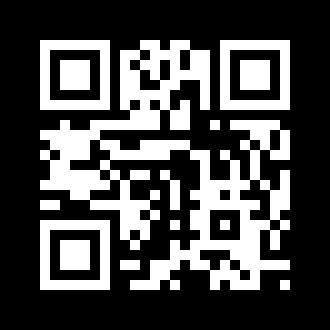

In [23]:
import qrcode
qr = qrcode.QRCode(
    version=1, #qr code size: 1-40 where 1 is the smallest
    error_correction=qrcode.constants.ERROR_CORRECT_H, #error correction: L,M,Q,H where H is the most randomised
    box_size=10, #how many pixels each box is
    border=4, #how many boxes wide the border is: minimum 4
)
qr.add_data('Some data')
qr.make(fit=True)

img = qr.make_image(fill_color="white", back_color="black") #can be RGB color tuples
img

# Styling the eyes

In [43]:
import PIL
from PIL import Image, ImageDraw

def style_inner_eyes(img):
  img_size = img.size[0]
  eye_size = 70 #default
  quiet_zone = 40 #default
  mask = Image.new('L', img.size, 0)
  draw = ImageDraw.Draw(mask)
  draw.rectangle((60, 60, 90, 90), fill=255) #top left eye
  draw.rectangle((img_size-90, 60, img_size-60, 90), fill=255) #top right eye
  draw.rectangle((60, img_size-90, 90, img_size-60), fill=255) #bottom left eye
  return mask

def style_outer_eyes(img):
  img_size = img.size[0]
  eye_size = 70 #default
  quiet_zone = 40 #default
  mask = Image.new('L', img.size, 0)
  draw = ImageDraw.Draw(mask)
  draw.rectangle((40, 40, 110, 110), fill=255) #top left eye
  draw.rectangle((img_size-110, 40, img_size-40, 110), fill=255) #top right eye
  draw.rectangle((40, img_size-110, 110, img_size-40), fill=255) #bottom left eye
  draw.rectangle((60, 60, 90, 90), fill=0) #top left eye
  draw.rectangle((img_size-90, 60, img_size-60, 90), fill=0) #top right eye
  draw.rectangle((60, img_size-90, 90, img_size-60), fill=0) #bottom left eye  
  return mask  

In [78]:
import qrcode
import PIL
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import RoundedModuleDrawer
from qrcode.image.styles.moduledrawers import VerticalBarsDrawer

from  qrcode.image.styles.colormasks import SolidFillColorMask
from PIL import Image, ImageDraw

if not hasattr(PIL.Image, 'Resampling'):
  PIL.Image.Resampling = PIL.Image
# Now PIL.Image.Resampling.BICUBIC is always recognized.


qr = qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_H)

qr.add_data('http://www.amazon.com')

qr_inner_eyes_img = qr.make_image(image_factory=StyledPilImage,
                            eye_drawer=RoundedModuleDrawer(radius_ratio=1.2),
                            color_mask=SolidFillColorMask(back_color=(255, 255, 255), front_color=(255, 153, 0)))

qr_outer_eyes_img = qr.make_image(image_factory=StyledPilImage,
                            eye_drawer=VerticalBarsDrawer(),
                            color_mask=SolidFillColorMask(back_color=(255, 255, 255), front_color=(0, 0, 0)))                            

qr_img = qr.make_image(image_factory=StyledPilImage,
                       module_drawer=RoundedModuleDrawer(),
                       color_mask=SolidFillColorMask(front_color=(0, 0, 0)),
                       embeded_image_path="my-rounded-logo.png")

inner_eye_mask = style_inner_eyes(qr_img)
outer_eye_mask = style_outer_eyes(qr_img)
intermediate_img = Image.composite(qr_inner_eyes_img, qr_img, inner_eye_mask)
final_image = Image.composite(qr_outer_eyes_img, intermediate_img, outer_eye_mask)
final_image.save('my-qrcode.png')

# Adding logos

In [53]:
import PIL
from PIL import Image, ImageDraw

def add_corners(im, rad):
    circle = Image.new('L', (rad * 2, rad * 2), 0)
    draw = ImageDraw.Draw(circle)
    draw.ellipse((0, 0, rad * 2 - 1, rad * 2 - 1), fill=255)
    alpha = Image.new('L', im.size, 255)
    w, h = im.size
    alpha.paste(circle.crop((0, 0, rad, rad)), (0, 0))
    alpha.paste(circle.crop((0, rad, rad, rad * 2)), (0, h - rad))
    alpha.paste(circle.crop((rad, 0, rad * 2, rad)), (w - rad, 0))
    alpha.paste(circle.crop((rad, rad, rad * 2, rad * 2)), (w - rad, h - rad))
    im.putalpha(alpha)
    return im

im = Image.open('my-logo.png')
im = add_corners(im, 100)
im.save('my-rounded-logo.png')